In [1]:
########################################
#Precision & Recall change scatterplots#
#Maintainer: Christopher Chan          #
#Version: 0.1.1                        #
#Date: 2022-08-06                      #
########################################

import os, sys, re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style = "whitegrid")

depth_wise = pd.read_excel(os.path.join(os.getcwd(), "Precision_Recall_change.ods"), sheet_name = "Depth-wise")
data_wise = pd.read_excel(os.path.join(os.getcwd(), "Precision_Recall_change.ods"), sheet_name = "Dataset-wise")
weight_wise = pd.read_excel(os.path.join(os.getcwd(), "Precision_Recall_change.ods"), sheet_name = "Weights-wise")

In [2]:
depth_wise

,Architecture,Input dataset,Precision change,Recall change
0,4 to 5 layer U-Net (NoIMN),KBY,0.011,-0.003
1,4 to 5 layer U-Net (NoIMN),KBY + DZK + DZKN,0.007,-0.002
2,EfficientNet B1 to B2 U-Net (NoIMN),KBY,-0.003,-0.012
3,EfficientNet B1 to B2 U-Net (IMN),KBY,0.003,-0.006
4,EfficientNet B1 to B2 U-Net (NoIMN),KBY + DZK + DZKN,0.023,0.006
5,EfficientNet B1 to B2 U-Net (IMN),KBY + DZK + DZKN,-0.006,-0.002


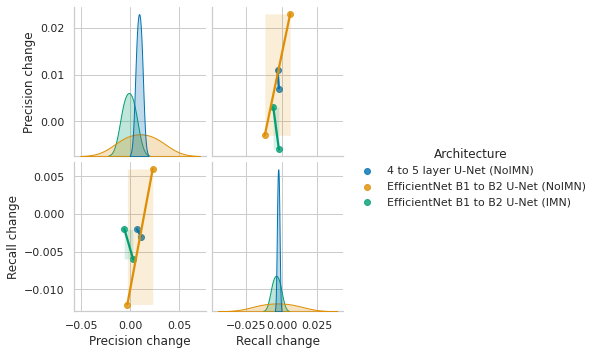

In [3]:
# Depth-wise change regplot
depth_PS = sns.pairplot(depth_wise, 
                        x_vars = ["Precision change", "Recall change"], y_vars = ["Precision change", "Recall change"],
                        hue = "Architecture", kind = "reg", palette = "colorblind")

In [4]:
data_wise

,Input dataset,Architecture,Initialised weights,Precision change,Recall change
0,KBY to ALL,4-layer U-Net (NoIMN),None,-0.065,-0.016
1,KBY to ALL,5-layer U-Net (NoIMN),None,-0.070,-0.153
2,KBY to ALL,EfficientNet B1 U-Net (NoIMN),None,-0.124,-0.044
3,KBY to ALL,EfficientNet B1 U-Net (IMN),ImageNet,-0.119,-0.032
4,KBY to ALL,EfficientNet B1 U-Net (OCC),OCC,-0.002,-0.387
5,KBY to ALL,EfficientNet B1 U-Net (OCC transfer-trained),OCC transfer-trained,-0.125,-0.043
6,KBY to ALL,EfficientNet B2 U-Net (NoIMN),None,-0.099,-0.026
7,KBY to ALL,EfficientNet B2 U-Net (IMN),ImageNet,-0.128,-0.028


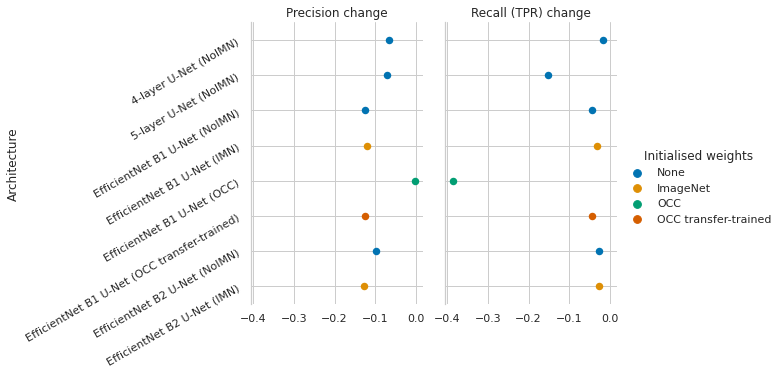

In [5]:
# Dataset-wise change regplot
#data_PS = sns.pairplot(data_wise, 
#                        x_vars = ["Precision change", "Recall change"], y_vars = ["Precision change", "Recall change"],
#                        hue = "Architecture", kind = "scatter", palette = "colorblind")

data_wise_L = pd.melt(data_wise, id_vars = ["Input dataset", "Architecture", "Initialised weights"])

data_wise_L

data_SP = sns.catplot(data = data_wise_L, x = "value", y = "Architecture",
                      hue = "Initialised weights", col = "variable",
                      kind = "strip", orient = "h", jitter = False,
                      palette = "colorblind", s = 7.5)


# Use semantically meaningful titles for the columns
titles = ["Precision change", "Recall (TPR) change"]

data_SP.despine(bottom = True)

for ax, title in zip(data_SP.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title = title)
    
    for label in ax.axes.get_yticklabels(which = 'major'):
        label.set(rotation=30, horizontalalignment = 'right')

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_xlabel("")

plt.show()

In [6]:
weight_wise

,Architecture,Weights change,Input dataset,Precision change,Recall change
0,EfficientNet B1 U-Net (NoIMN to IMN),None to ImageNet,KBY,0.003,0.0080
1,EfficientNet B1 U-Net (NoIMN to IMN),None to ImageNet,KBY + DZK + DZKN,0.009,0.0197
2,EfficientNet B1 U-Net (OCC to OCC transfer-tra...,OCC to OCC transfer-trained,KBY,0.000,0.3060
3,EfficientNet B1 U-Net (OCC to OCC transfer-tra...,OCC to OCC transfer-trained,KBY + DZK + DZKN,-0.122,0.6490
4,EfficientNet B2 U-Net (NoIMN to IMN),None to ImageNet,KBY,0.009,0.0140
5,EfficientNet B2 U-Net (NoIMN to IMN),None to ImageNet,KBY + DZK + DZKN,-0.020,0.0120


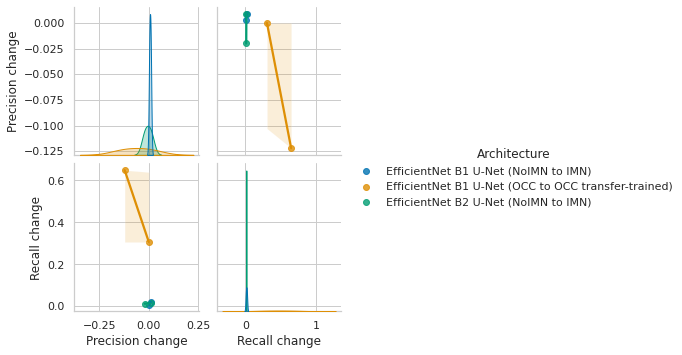

In [7]:
# Dataset-wise change regplot
weight_PS = sns.pairplot(weight_wise, 
                         x_vars = ["Precision change", "Recall change"], y_vars = ["Precision change", "Recall change"],
                         hue = "Architecture", kind = "reg", palette = "colorblind")